<a href="https://colab.research.google.com/github/AI-KPI/DLBookNotes/blob/main/2.2 Multiplying Matrices and Vectors/2.2 Multiplying Matrices and Vectors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Plot style
sns.set()
%pylab inline
pylab.rcParams['figure.figsize'] = (4, 4)
# Avoid inaccurate floating values (for inverse matrices in dot product for instance)
# See https://stackoverflow.com/questions/24537791/numpy-matrix-inversion-rounding-errors
np.set_printoptions(suppress=True)

Populating the interactive namespace from numpy and matplotlib


In [3]:
%%html
<style>
.pquote {
  text-align: left;
  margin: 40px 0 40px auto;
  width: 70%;
  font-size: 1.5em;
  font-style: italic;
  display: block;
  line-height: 1.3em;
  color: #5a75a7;
  font-weight: 600;
  border-left: 5px solid rgba(90, 117, 167, .1);
  padding-left: 6px;
}
.notes {
  font-style: italic;
  display: block;
  margin: 40px 10%;
}
img + em {
  text-align: center;
  display: block;
  color: gray;
  font-size: 0.9em;
  font-weight: 600;
}
</style>

In [4]:
def plotVectors(vecs, cols, alpha=1):
    """
    Plot set of vectors.

    Parameters
    ----------
    vecs : array-like
        Coordinates of the vectors to plot. Each vectors is in an array. For
        instance: [[1, 3], [2, 2]] can be used to plot 2 vectors.
    cols : array-like
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
    alpha : float
        Opacity of vectors

    Returns:

    fig : instance of matplotlib.figure.Figure
        The figure of the vectors
    """
    plt.figure()
    plt.axvline(x=0, color='#A9A9A9', zorder=0)
    plt.axhline(y=0, color='#A9A9A9', zorder=0)

    for i in range(len(vecs)):
        x = np.concatenate([[0,0],vecs[i]])
        plt.quiver([x[0]],
                   [x[1]],
                   [x[2]],
                   [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=cols[i],
                  alpha=alpha)

$$
\newcommand\bs[1]{\boldsymbol{#1}}
$$

<span class='notes'>
  Цей вміст є частиною серії, що йде за главою 2 про лінійну алгебру з [Deep Learning Book](http://www.deeplearningbook.org/)Goodfellow, I., Bengio, Y., and Courville, A. (2016). Він спрямований на надання інтуїцій/малюнків/python коду на математичних теоріях і побудований на моєму розумінні цих понять. Ви можете перевірити навчальний план у [introduction post](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-Introduction/).
</span>

# Вступ

Ця глава досить важка за своїм розміром і змістом, але я зробив все, що міг, щоб зробити її більш інтуїтивно зрозумілою і візуальною. Ми побачимо, як графічно представляти системи рівнянь, як інтерпретувати кількість рішень системи, що таке лінійна комбінація і багато чого іншого. Як завжди, ми будемо використовувати Numpy/Matplotlib, як інструмент для експериментів над цими концепціями і, сподіваюся, отримаємо більш конкретне розуміння.

# 2.4 Лінійна залежність і проміжок часу

Оскільки мова йде про системи лінійних рівнянь, давайте почнемо знову з набору рівнянь:

$$\bs{Ax}=\bs{b}$$

Ми побачили в [2.2](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.2-Multiplying-Matrices-and-Vectors/), що ця система відповідає:

$$
A_{1,1}x_1 + A_{1,2}x_2 + \cdots + A_{1,n}x_n = b_1 \\\\
A_{2,1}x_1 + A_{2,2}x_2 + \cdots + A_{2,n}x_n = b_2 \\\\
\cdots \\\\
A_{m,1}x_1 + A_{m,2}x_2 + \cdots + A_{m,n}x_n = b_n
$$

Отже, у нас є кілька рівнянь з кількома невідомими. Ми знаємо $A_{1,1}...A_{m,n}$ і $b_1...b_n$. Для вирішення системи нам потрібно знайти значення змінних  $x_1...x_n$, що задовольняє всі рівняння.

# Кількість рішень

Перше, що потрібно запитати, коли ми стикаємося з такою системою рівнянь: яка кількість рішень?

Три випадки можуть представляти кількість рішень системи рівнянь $\bs{Ax}=\bs{b}$.
 
1. Без рішень
2. Одне рішення
3. Безмежна кількість рішень
 
## Чому не може бути більше 1 рішення і менше, ніж нескінченна кількість рішень?

### Інтуїція

Просто тому, що ми маємо справу з **лінійних** систем! Дві лінії не можуть перетинати кілька разів.

Щоб мати можливість візуалізувати його, давайте візьмемо два виміри і два рівняння. Рішення системи відповідають перетину ліній. Один з варіантів полягає в тому, що дві лінії ніколи не перетинають (паралельно). Інший варіант полягає в тому, що вони перетинають один раз. І, нарешті, останній варіант полягає в тому, що вони перетинаються всюди (накладаються):

<img src="images/number-solutions-system-equations.png" width="700" alt="Examples of systems of equations with 0, 1 and an infinite number of solutions" title="System of equations with 0, 1 and an infinite number of solutions">
<em>Система рівнянь не має рішення, 1 рішення або нескінченну кількість рішень</em>

<span class='pquote'>
    Дві лінії не можуть перетинати кілька разів, але можуть бути паралельними або накладеними
</span>

### Доказ

Представимо, що $\bs{x}$ та $\bs{y}$ є двома рішеннями нашої системи. Це означає, що

$$
\begin{cases}
\bs{Ax}=\bs{b}\\\\
\bs{Ay}=\bs{b}
\end{cases}
$$

У цьому випадку, ми будемо бачити що $\bs{z}=\alpha \bs{x} + (1-\alpha \bs{y})$ також є рішенням для будь-якої цінності $\alpha$. Якщо $\bs{z}$ є рішенням, можна сказати, що $\bs{Az}=\bs{b}$. Дійсно, якщо ми підключаємо $\bs{z}$ в ліву сторону рівняння ми отримуємо:

$$
\begin{align*}
\bs{Az}&=\bs{A}(\alpha x + (1-\alpha y))\\\\
    &=\bs{Ax}\alpha + \bs{A}(1-\alpha y)\\\\
    &=\bs{Ax}\alpha + \bs{Ay}(1-\alpha)
\end{align*}
$$

А оскільки $\bs{Ax}=\bs{Ay}=\bs{b}$. Це призводить до:

$$
\begin{align*}
\bs{Az}&=\bs{b}\alpha + \bs{b}(1-\alpha)\\\\
    &=\bs{b}\alpha + \bs{b}-\bs{b}\alpha\\\\
    &=\bs{b}
\end{align*}
$$

Отже, $\bs{z}$ також є рішенням.

# Матрична репрезентативна система

Як ми це побачили, рівняння $\bs{Ax}=\bs{b}$ може бути представлена матрицею $\bs{A}$ містить вагу кожної змінної та вектор $\bs{x}$ кожна змінна (див. [2.2](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.2-Multiplying-Matrices-and-Vectors/)). Продукт $\bs{A}$ і $\bs{x}$ дає $\bs{b}$ це ще один вектор розміру $m$:

$$
\begin{bmatrix}
    A_{1,1} & A_{1,2} & \cdots & A_{1,n} \\\\
    A_{2,1} & A_{2,2} & \cdots & A_{2,n} \\\\
    \cdots & \cdots & \cdots & \cdots \\\\
    A_{m,1} & A_{m,2} & \cdots & A_{m,n}
\end{bmatrix}
\begin{bmatrix}
    x_1 \\\\
    x_2 \\\\
    \cdots \\\\
    x_n
\end{bmatrix}
=
\begin{bmatrix}
    b_1 \\\\
    b_2 \\\\
    \cdots \\\\
    b_m
\end{bmatrix}
$$

Що відповідає набору лінійніх рівнянь

$$
A_{1,1}x_1 + A_{1,2}x_2 + \cdots + A_{1,n}x_n = b_1 \\\\
A_{2,1}x_1 + A_{2,2}x_2 + \cdots + A_{2,n}x_n = b_2 \\\\
\cdots \\\\
A_{m,1}x_1 + A_{m,2}x_2 + \cdots + A_{m,n}x_n = b_n
$$

Ось деякі інтуїції про те, що представлено цими матриці. Кількість стовпчиків $s{A}$ це кількість розмірів нашого векторного простору. Це кількість $n$ напрямків, на які ми можемо подорожувати. Кількість рішень нашої лінійної системи відповідає кількості способів, якими ми можемо досягти $s{b}$ подорожуючи по наших $n$ розмірах.

Але щоб зрозуміти це, потрібно наголити, що існують дві можливості для представлення системи рівнянь:  ***цифра рядка*** і ***цифра стовпця***.

# Графічні подання: рисунки рядків і стовпців


Рекомендую подивитися на [цей відео урок Гілберта Стренга](http://ia802205.us.archive.org/18/items/MIT18.06S05_MP4/01.mp4). Він забезпечує дуже приємну інтуїцію про ці два способи дивлячись на систему лінійних рівнянь.


Коли ви шукаєте матрицю. $\bs{A}$:

$$
\bs{A}=\begin{bmatrix}
    A_{1,1} & A_{1,2} & \cdots & A_{1,n} \\\\
    A_{2,1} & A_{2,2} & \cdots & A_{2,n} \\\\
    \cdots & \cdots & \cdots & \cdots \\\\
    A_{m,1} & A_{m,2} & \cdots & A_{m,n}
\end{bmatrix}
$$

Ви можете розглядати його рядки або його стовпці окремо. Нагадаємо, що значення є вагою, що відповідає кожній змінній. Кожен рядок синтезує одне рівняння. Кожен стовпець - це набір ваг, що надається змінній 1.

Можна намалювати інше графічне представлення набору рівнянь, дивлячись на рядки або на стовпці.

## Графічне подання 1: рисунок рядка

Цифра рядка, можливо, більш звична, тому що це представлення, яке використовується, коли у нас є тільки одне рівняння. Тепер він може бути поширений на нескінченну кількість рівнянь і невідомих (навіть якщо було б важко представляти 9-вимірний гіперплан в 10-вимірному просторі ...).

Ми сказали, що рішення лінійних систем рівнянь - це набори значень $x_1...x_n$ які задовольняють всі рівняння, тобто значення, взяті невідомими. Наприклад, у випадку з $\bs{A}$ бути ($2 \times 2$) матрицею ($n=m=2$) рівняння відповідають лініям у 2-вимірному просторі, а вирішенням системи є перетин цих ліній.

Зауважте, що зв'язування одного напрямку в просторі з одним параметром є лише одним із способів представлення рівнянь. Існує кілька способів представлення більш ніж 3 систем параметрів. Наприклад, ви можете додати кольори, щоб мати представлення четвертого виміру. Це все про **представництво**.

<img src="images/representing-features.png" width="900" alt="Different ways of representing features" title="Feature representation">
<em>Графічні представлення функцій</em>

### Перевизначені та невизначені системи

Лінійну систему рівнянь можна розглядати як набір гіперпланів $(n-1)$-dimensional у просторі *n*-dimension. Так лінійну систему можна охарактеризувати своєю кількістю рівнянь ($m$) і кількістю невідомих змінних ($n$).

- Якщо рівнянь більше, ніж несвідомих, система називається **overdetermined**. У наведеному нижче прикладі ми можемо побачити систему з 3 рівнянь (представлена 3 рядками) і 2 невідомих (відповідає 2 вимірам). У цьому прикладі немає рішення, оскільки немає сенсу належати до трьох рядків:

<img src="images/overdetermined-system-linear-equations.png" width="300" alt="Example of an overdetermined system of linear equations with no solution" title="Example of an overdetermined system of linear equations with no solution">
<em>Приклад перевизначення системи лінійніх рівнянь без розчину</em>

- Якщо невідомих більше, ніж рівнянь, система називається **не визначено**. На наступному зображенні є лише 1 рівняння (1 рядок) і 2 розміри. Кожна точка, яка знаходиться на лінії є рішенням системи. У цьому випадку існує нескінченна кількість рішень:

<img src="images/underdetermined-system-linear-equations.png" width="300" alt="Example of an underdetermined system of linear equations with an infinite number of solutions" title="Example of an underdetermined system of linear equations with an infinite number of solutions">
<em>Приклад невизначеної системи лінійних рівнянь з нескінченною кількістю рішень</em>


Давайте подивимося кілька прикладів цих різних випадків, щоб уточнити це.

### Приклад 1. 

$m=1$, $n=2$:  **1 рівняння та 2 змінні**

$$
A_{1,1}x_1 + A_{1,2}x_2 = b_1
$$

Графічна інтерпретація $n =2$ полягає в тому, що у нас є об'їдка пробіл. Таким чином, ми можемо представляти його з 2 осями. Оскільки наш гіперплан має $n-1 $-dimensional, у нас є 1-D гіперплан. Це просто лінія. Як $m = 1 $, у нас є тільки одне рівняння. Це означає, що у нас є тільки один рядок, що характеризує нашу лінійна система.

Зауважте, що останнє рівняння також можна написати у спосіб, який може бути більш звичайним:

$$
y = ax + b
$$

з $y$ відповідає $x_2$, $x$ відповідає $x_1$, $a$ що відповідає $A_{1,1}$ і $A_{1,2}=1$.

Для цього першого прикладу ми візьмемо наступне рівняння:

$$
y = 2x + 1
$$

Давайте нама сформулюємо лінію цього рівняння з Numpy і Matplotlib (див. БОНУС в [2.3](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.3-Identity-and-Inverse-Matrices/) для легких порад для побудови рівнянь).

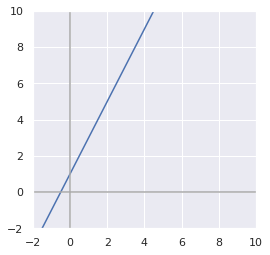

In [5]:
x = np.arange(-10, 10)
y = 2*x + 1

plt.figure()
plt.plot(x, y)
plt.xlim(-2, 10)
plt.ylim(-2, 10)
# draw axes
plt.axvline(x=0, color='#A9A9A9')
plt.axhline(y=0, color='#A9A9A9')
plt.show()
plt.close()

#### Рішення

Рішення цієї лінійні системи відповідають значенню $x$ і $y$ таких як $y=2x+1$. Графічно він відповідає кожній точці на лінії, тому існує нескінченна кількість рішень. Наприклад, одним з рішень є $x = 0 $ і $y = 1 $, або $x = 1 $ і $y = 3 $ і так далі.

### Приклад 2.

*m*=2, *n*=2: **2 рівняння та 2 невідомих**

$$
A_{1,1}x_1 + A_{1,2}x_2 = b_1\\\\
A_{2,1}x_1 + A_{2,2}x_2 = b_2
$$

Графічна інтерпретація цієї системи полягає в тому, що у нас все ще є лінії в 2-D просторі. Однак на цей раз є 2 рядки, так як є 2 рівняння.

Візьмемо ці рівняння як приклад:

$$
\begin{cases}
y = 2x + 1\\\\
y = 6x - 2
\end{cases}
$$


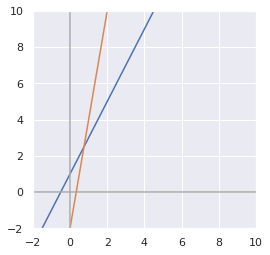

In [6]:
x = np.arange(-10, 10)
y = 2*x + 1
y1 = 6*x - 2

plt.figure()
plt.plot(x, y)
plt.plot(x, y1)
plt.xlim(-2, 10)
plt.ylim(-2, 10)
# draw axes
plt.axvline(x=0, color='#A9A9A9')
plt.axhline(y=0, color='#A9A9A9')
plt.show()
plt.close()

Як ми бачили, з 2 лініями в 2-D просторі, є кілька можливих випадків. На наведеному вище малюнку перетинають дві лінії, тому є одне унікальне рішення. Якщо вони накладаються (однакове рівняння або еквівалент, *cf*. лінійна залежність) існує нескінченна кількість рішень, оскільки кожна точка ліній відповідає перетину. Якщо вони паралельні, рішення немає.

Те ж саме можна спостерігати і з іншими значеннями $m$ (кількість рівнянь) і $n$ (кількість розмірів). Наприклад, два двовигові літаки в об'їдку можуть бути надопомога (нескінченно багато рішень), або схрещені (нескінченно багато рішень, оскільки їх перетин є лінією), або паралельні (без рішення).

### Приклад 3.

*m*=3, *n*=2: **3 рівняння і 2 невідомих**

$$
A_{1,1}x_1 + A_{1,2}x_2 = b_1\\\\
A_{2,1}x_1 + A_{2,2}x_2 = b_2\\\\
A_{3,1}x_1 + A_{3,2}x_2 = b_3
$$

Така ж ідея стоїть з більш ніж 2 рівняннями в об'їдки. У цьому прикладі ми маємо наступні 3 рівняння:

$$
\begin{cases}
y = 2x + 1\\\\
y = 6x - 2\\\\
y = \frac{1}{10}x+6
\end{cases}
$$

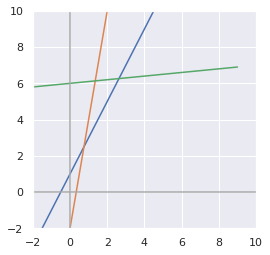

In [7]:
x = np.arange(-10, 10)
y = 2*x + 1

y1 = 6*x - 2
y2 = 0.1*x+6

plt.figure()
plt.plot(x, y)
plt.plot(x, y1)
plt.plot(x, y2)
plt.xlim(-2, 10)
plt.ylim(-2, 10)
# draw axes
plt.axvline(x=0, color='#A9A9A9')
plt.axhline(y=0, color='#A9A9A9')
plt.show()
plt.close()

У наведеному вище випадку є 3 рівняння і немає рішення, тому що немає точки в просторі, який знаходиться на кожному з цих рядків.

## Лінійна комбінація

Перед тим, як зайти на цифру стовпчика, потрібно поговорити про лінійну комбінацію. Лінійна комбінація з 2 векторів відповідає їх зваженій сумі.

### Приклад 4.

Візьмемо два вектори

$$
\vec{u}=
\begin{bmatrix}
    1 \\\\
    3
\end{bmatrix}
$$

and

$$
\vec{v}=
\begin{bmatrix}
    2 \\\\
    1
\end{bmatrix}
$$

Ці два вектори мають 2 розміри і, таким чином, містять координати в 2-D.


Лінійна комбінація $\vec{u}$ і $\vec{v}$

$$
a\vec{u}+b\vec{v}= a
\begin{bmatrix}
    1 \\\\
    3
\end{bmatrix} + b\begin{bmatrix}
    2 \\\\
    1
\end{bmatrix}
$$

з $a$ і $b$ вага векторів.

Графічно вектори додаються для досягнення певної точки в просторі. Наприклад, якщо $a = 2 $ і $b = 1 $:

$$
2\vec{u}+\vec{v}= 2
\begin{bmatrix}
    1 \\\\
    3
\end{bmatrix} +
\begin{bmatrix}
    2 \\\\
    1
\end{bmatrix} =
\begin{bmatrix}
    2 \cdot 1 + 2 \\\\
    2 \cdot 3 + 1
\end{bmatrix} =
\begin{bmatrix}
    4 \\\\
    7
\end{bmatrix}
$$

Сума $\vec{u}$ і $\vec{v}$ - це вектор, який досягне точки корфування $(4, 7)$. Щоб показати, що на графіку, я буду використовувати користувальницьку функцію 'plotVectors()' що я визначив на початку [ноутбук](https://github.com/hadrienj/deepLearningBook-Notes/blob/master/2.4%20Linear%20Dependence%20and%20Span/2.4%20Linear%20Dependence%20and%20Span.ipynb). Він приймає набір координат і масив кольорів, як вхід і побудова відповідних векторів. Отже, давайте складати $\vec{u}$ і $\vec{v}$:

(0.0, 5.0)

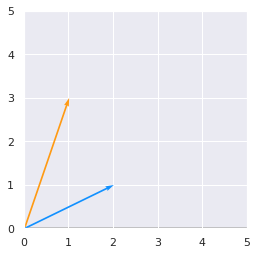

In [8]:
orange = '#FF9A13'
blue = '#1190FF'
plotVectors([[1, 3], [2, 1]], [orange, blue])
plt.xlim(0, 5)
plt.ylim(0, 5)

Тепер ми додамо ці вектори і їх вагу. Це дає:

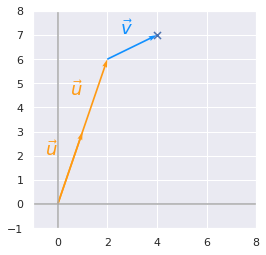

In [9]:
# Вага векторів
a = 2
b = 1
# Координати початку і завершення векторів
u = [0,0,1,3]
v = [2,6,2,1]

plt.quiver([u[0], a*u[0], b*v[0]],
           [u[1], a*u[1], b*v[1]],
           [u[2], a*u[2], b*v[2]],
           [u[3], a*u[3], b*v[3]],
           angles='xy', scale_units='xy', scale=1, color=[orange, orange, blue])
plt.xlim(-1, 8)
plt.ylim(-1, 8)
# Draw axes
plt.axvline(x=0, color='#A9A9A9')
plt.axhline(y=0, color='#A9A9A9')
plt.scatter(4,7,marker='x',s=50)
# Draw the name of the vectors
plt.text(-0.5, 2, r'$\vec{u}$', color=orange, size=18)
plt.text(0.5, 4.5, r'$\vec{u}$', color=orange, size=18)
plt.text(2.5, 7, r'$\vec{v}$', color=blue, size=18)
plt.show()
plt.close()

Ми бачимо, що в кінцевому підсумку з координатами ($4$, $7$).

## Проміжок часу

Візьміть вектори $\vec{u}$ і $\vec{v}$ з попереднього прикладу і подумайте про всі точки, які ви можете досягти за їх комбінацією, змінюючи $a $ і $b $. Цей набір точок є проміжком набору векторів $\{\vec{u}, \vec{v}\}$.

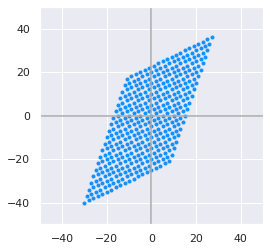

In [10]:
# Визначення u і v
u = [1, 3]
v = [2, 1]

# Побудова зразка набору точок у проміжку часу з u і v
for a in range(-10, 10):
    for b in range(-10, 10):
        plt.scatter(u[0] * a + v[0] * b, u[1] * a + v[1] * b, marker='.', color=blue)

# Визначення розмірів x і y
plt.xlim(-50, 50)
plt.ylim(-50, 50)

# Малювати осі
plt.axvline(x=0, color='#A9A9A9')
plt.axhline(y=0, color='#A9A9A9')

plt.show()
plt.close()

## Примітка про пробіли та підпростори

(Детальніше див. Стренг (2006), с.70)

Простір вектора визначає всі значення, які можуть бути прийняті цим вектором. Векторні пробіли позначають $\mathbb{R}$ оскільки значення є реальними числами. Якщо є кілька вимірів, пробіл позначається $\mathbb{R}^n$ з $n$ відповідає кількості розмірів. Наприклад, $\mathbb{R}^2$ - це простір звичайного літака $x $-$y$, де значення $x$ і $y$ є реальними числами.

Якщо взяти 2-вимірну площину в $\mathbb{R}^3$ (3-вимірний простір), ця площина є **підпростором** вашого оригінального простору $\mathbb{R}^3$. Таким же чином, якщо почати з простору $\mathbb{R}^2$ і прийняти рядок у цьому просторі, цей рядок є підпростором вихідного простору.

Лінійна комбінація векторів дає вектори в оригінальному просторі. Кожна лінійна комбінація векторів всередині простору буде залишатися в цьому просторі. Наприклад, якщо ви берете 2 рядки в просторі $\mathbb{R}^2$, будь-які лінійні комбінації дадуть вам вектор у тому ж просторі $\mathbb{R}^2$.

<span class='pquote'>
Лінійна комбінація векторів дає вектори в оригінальному просторі
</span>

## Графічне подання 2: рисунок стовпця

Також можна представити набір рівнянь, враховуючи, що вектор рішення $\bs{b}$ відповідає лінійному поєднанню кожного стовпця, помноженого на їх вагу.

З набору рівнянь:

$$
A_{1,1}x_1 + A_{1,2}x_2 + A_{1,n}x_n = b_1 \\\\
A_{2,1}x_1 + A_{2,2}x_2 + A_{2,n}x_n = b_2 \\\\
\cdots \\\\
A_{m,1}x_1 + A_{m,2}x_2 + A_{m,n}x_n = b_m
$$

Потім форма стовпця:

$$
x_1
\begin{bmatrix}
    A_{1,1}\\\\
    A_{2,1}\\\\
    A_{m,1}
\end{bmatrix}
+
x_2
\begin{bmatrix}
    A_{1,2}\\\\
    A_{2,2}\\\\
    A_{m,2}
\end{bmatrix}
+
x_n
\begin{bmatrix}
    A_{1,n}\\\\
    A_{2,n}\\\\
    A_{m,n}
\end{bmatrix}
=
\begin{bmatrix}
    b_1\\\\
    b_2\\\\
    b_m
\end{bmatrix}
$$

З графічної точки зору, ми повинні подорожувати від походження (нуль на кожному вимірі) до точки координати $\bs{b}$. Стовпці $\bs{A}$ дають нам напрямки, за допомогою які ми можемо подорожувати, і їх вага - це довжина шляху в цьому напрямку.

<span class='pquote'>
Стовпці $\bs{A}$ дають нам напрямки, за допомогою яких ми можемо подорожувати, і їх вага - це довжина шляху в кожному напрямку.
</span>

### Приклад 5. 

$m=2$, $n=2$: 2 рівняння та 2 змінні

$$
A_{1,1}x_1 + A_{1,2}x_2 = b_1\\\\
A_{2,1}x_1 + A_{2,2}x_2 = b_2
$$

$$
\begin{cases}
y = \frac{1}{2}x+1\\\\
y = -x + 4
\end{cases}
\Leftrightarrow
\begin{cases}
\frac{1}{2}x-y = -1\\\\
x+y=4
\end{cases}
$$

Так ось матриця $\bs{A}$:

$$
\bs{A}=
\begin{bmatrix}
    \frac{1}{2} & -1 \\\\
    1 & 1
\end{bmatrix}
$$

Цифра стовпця дає нам:

$$
x
\begin{bmatrix}
    \frac{1}{2} \\\\
    1
\end{bmatrix}
+
y
\begin{bmatrix}
    -1 \\\\
    1
\end{bmatrix}
=
\begin{bmatrix}
    -1 \\\\
    4
\end{bmatrix}
$$

Мета полягає в тому, щоб знайти значення ваг ($x$ і $y$), для яких лінійна комбінація вектора

$$
\begin{bmatrix}
    \frac{1}{2} \\\\
    1
\end{bmatrix}
$$

і

$$
\begin{bmatrix}
    -1 \\\\
    1
\end{bmatrix}
$$

дає вектор 

$$
\begin{bmatrix}
    -1 \\\\
    4
\end{bmatrix}
$$

Ми вирішимо систему графічно, смислюючи рівняння і шукаючи їх перетин:

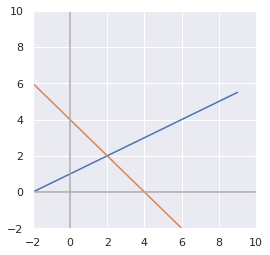

In [11]:
x = np.arange(-10, 10)
y = 0.5*x + 1

y1 = -x + 4

plt.figure()
plt.plot(x, y)
plt.plot(x, y1)
plt.xlim(-2, 10)
plt.ylim(-2, 10)
# малюємо осі
plt.axvline(x=0, color='#A9A9A9')
plt.axhline(y=0, color='#A9A9A9')
plt.show()
plt.close()

Ми бачимо, що рішення (перетин ліній, що представляють наші два рівняння) $x = 2 $ і $y = 2 $. Це означає, що лінійна комбінація полягає в наступному:

$$
2
\begin{bmatrix}
    \frac{1}{2} \\\\
    1
\end{bmatrix}
+
2
\begin{bmatrix}
    -1 \\\\
    1
\end{bmatrix}
=
\begin{bmatrix}
    -1 \\\\
    4
\end{bmatrix}
$$

Скажімо так 

$$
\vec{u}=
\begin{bmatrix}
    \frac{1}{2} \\\\
    1
\end{bmatrix}
$$

і

$$
\vec{v}=
\begin{bmatrix}
    -1 \\\\
    1
\end{bmatrix}
$$

Щоб поговорити в терміні цифри стовпця, ми можемо досягти точки координат $(-1, 4)$ якщо додати в два рази вектор $\vec{u}$ і в два рази вектор $\vec{v}$. Давайте перевіримо, що:

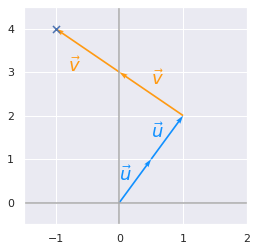

In [12]:
u = [0,0,0.5,1]
u_bis = [u[2],u[3],u[2],u[3]]
v = [2*u[2],2*u[3],-1,1]
v_bis = [2*u[2]-1,2*u[3]+1,v[2],v[3]]

plt.quiver([u[0], u_bis[0], v[0], v_bis[0]],
           [u[1], u_bis[1], v[1], v_bis[1]],
           [u[2], u_bis[2], v[2], v_bis[2]],
           [u[3], u_bis[3], v[3], v_bis[3]],
           angles='xy', scale_units='xy', scale=1, color=[blue, blue, orange, orange])
# plt.rc('text', usetex=True)
plt.xlim(-1.5, 2)
plt.ylim(-0.5, 4.5)
# draw axes
plt.axvline(x=0, color='#A9A9A9')
plt.axhline(y=0, color='#A9A9A9')
plt.scatter(-1,4,marker='x',s=50)
plt.text(0, 0.5, r'$\vec{u}$', color=blue, size=18)
plt.text(0.5, 1.5, r'$\vec{u}$', color=blue, size=18)
plt.text(0.5, 2.7, r'$\vec{v}$', color=orange, size=18)
plt.text(-0.8, 3, r'$\vec{v}$', color=orange, size=18)
plt.show()
plt.close()

Ми бачимо, що він працює! Ми приїжджаємо до точки ($-1$, $4$).

## Визначте, чи має система одне і лише одне рішення для кожного значення $\bs{b}$.

Тепер ми побачимо, як визначити, чи є у системи рівнянь одне і тільки одне рішення. Зверніть увагу, що це тільки загальні випадки. Це можна розділити на дві вимоги:

1. Система повинна мати принаймні одне рішення
2. Потім система повинна мати **тільки** одне рішення

### Вимога 1. Невизначена система: система повинна мати принаймні одне рішення для кожного значення $\bs{b}$: $n\geq m$

<span class='pquote'>
Невизначена система рівнянь - це система з меншою кількість рівнянь, ніж невідома
</span>

Якщо ми хочемо, щоб наша система була одна і тільки одне рішення перша вимога полягає в тому, що $n $ не повинно бути більше, ніж $m $.

Візьмемо приклад матриці ($2\times 3$), яка відповідає набору з 2 рівнянь з 3 невідомими змінними:


<div>
$$
\begin{cases}
8x+y+z=1\\\\
x+y+z=1
\end{cases}
$$
</div>

<div>
$$
x
\begin{bmatrix}
    8 \\\\
    1
\end{bmatrix}
+
y
\begin{bmatrix}
    1 \\\\
    1
\end{bmatrix}
+
z
\begin{bmatrix}
    1 \\\\
    1
\end{bmatrix}
=
\begin{bmatrix}
    1 \\\\
    1
\end{bmatrix}
$$
</div>

Ось представлення літаків, накреслених за допомогою цього [веб-сайту](https://technology.cpm.org/general/3dgraph/):

<img src="images/intersection-2-planes-line.png" alt="Plot showing two planes. The intersection of the two planes is a line" title="The intersection of the two planes is a line" width="500">
<em>Перетин двох літаків є лінією</em>

Ми бачимо, що в кращому випадку дві площини не паралельні і є рішення набору рівнянь. Це означає, що вона існує деякі моменти, які покладаються на обидва літаки. Але ми також бачимо, що на перетині неминуче існує нескінченна кількість точок (лінія, яку ми можемо бачити на малюнку). Нам потрібна третя площина, щоб мати унікальне рішення.

### Вимога 2. Перевизначана система: система повинна мати **тільки** одне рішення для кожного значення $\bs{b}$: $m\geq n$


<span class='pquote'>
Перевизначна система рівнянь - це система з більшою кількість рівнянь, ніж невідомо
</span>

Цифра стовпця корисна для розуміння того, чому лінійна система зазвичай не має рішення, якщо $n$ (кількість невідомих) менша за $m$ (кількість рівнянь). Давайте додамо 1 рівняння до вищезгаданої системи, щоб в кінцевому підсумку з матрицею ($\3 times2$) (3 рівняння та 2 невідомо):

<div>
$$
\begin{cases}
y = \frac{1}{2}x+1\\\\
y = -x + 4\\\\
y = 7x + 2
\end{cases}
\Leftrightarrow
\begin{cases}
\frac{1}{2}x-y = -1\\\\
x+y=4\\\\
7x-y=2
\end{cases}
$$
</div>

This corresponds to:

<div>
$$
x
\begin{bmatrix}
    \frac{1}{2} \\\\
    1 \\\\
    7
\end{bmatrix}
+
y
\begin{bmatrix}
    -1 \\\\
    1 \\\\
    -1
\end{bmatrix}
=
\begin{bmatrix}
    -1 \\\\
    4 \\\\
    2
\end{bmatrix}
$$
</div>

Таким чином, ми все ще подорожуємо в нашому 2-вимірному просторі (див. сюжет простору стовпця вище), але точка, яку ми шукаємо, визначається 3 вимірами. Є випадки, коли третя координата не покладається на наш 2-$x $ $y $ літак. У цьому випадку рішення не існує.

<span class='pquote'>
     Ми подорожуємо в 2D просторі, але рішення визначається 3 розмірами. Якщо третя координата не покладається на нашу 2D-$x $ $y $ літак, то немає рішення.
</span>

### Лінійна залежність

Таким чином, кількість стовпців може надавати інформацію про кількість рішень. Але число, яке ми повинні враховувати, це кількість **лінійно незалежних** стовпчиків. Стовпці лінії залежать, якщо один з них є лінійна комбінація інших. Думаючи в колонці картини, напрямок двох лінійно залежних векторів однаковий. Це не додає вимір, який ми можемо використовувати для подорожей і досягнення $\bs{b}$.

Ось приклад лінійна система, що містить лінійна залежність:

$$
\begin{cases}
y = 2x+6\\\\
y = 2x
\end{cases}
\Leftrightarrow
\begin{cases}
2x-y = -6\\\\
2x-y=0
\end{cases}
$$

На рисунку рядка показано, що система не має рішення:

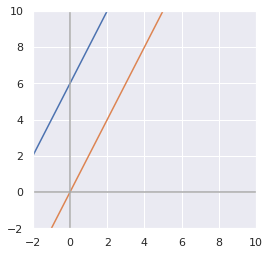

In [13]:
x = np.arange(-10, 10)
y = 2*x + 6

y1 = 2*x

plt.figure()
plt.plot(x, y)
plt.plot(x, y1)
plt.xlim(-2, 10)
plt.ylim(-2, 10)
# draw axes
plt.axvline(x=0, color='#A9A9A9')
plt.axhline(y=0, color='#A9A9A9')
plt.show()
plt.close()

Оскільки лінії паралельні, на їх перетині немає ніякого сенсу.

Малюнок стовпця також ілюструє точку:

$$
x
\begin{bmatrix}
    2 \\\\
    2
\end{bmatrix}
+
y
\begin{bmatrix}
    -1 \\\\
    -1
\end{bmatrix}
=
\begin{bmatrix}
    -6 \\\\
    0
\end{bmatrix}
$$


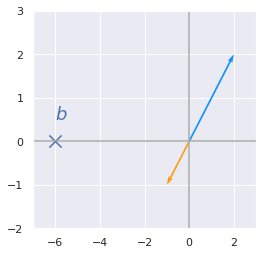

In [14]:
u = [0,0,2,2]
v = [0,0,-1,-1]

plt.quiver([u[0], v[0]],
           [u[1], v[1]],
           [u[2], v[2]],
           [u[3], v[3]],
           angles='xy', scale_units='xy', scale=1, color=[blue, orange])
plt.xlim(-7, 3)
plt.ylim(-2, 3)
# draw axes
plt.axvline(x=0, color='#A9A9A9')
plt.axhline(y=0, color='#A9A9A9')
plt.scatter(-6,0,marker='x',s=150)
plt.text(-6, 0.5, r'$b$', color='b', size=18)
plt.show()
plt.close()

Ми хотіли б піти на $b$ але єдиний шлях, який ми можемо зробити, це синя/помаранчева лінія. Друге рівняння не дає нам нового напрямку, оскільки це лише лінійна комбінація першого.

Таким чином, перевизначана система незалежних рівнянь має не більше 1 рішення.

### Квадратна матриця

Як ми могли задовольнити обидві вимоги ($m\geq n$ і $n\geq m$): ми повинні мати $m = n$!

Результатом всього цього є те, що системі потрібна **квадратна матриця** $\bs{A}$ ($m=n$) з лінійно незалежними стовпцями, щоб мати унікальне рішення для всіх значень $\bs{b}$.

<span class='pquote'>
Системі потрібна **квадратна матриця** $\bs{A}$ ($m=n$) з лінійно незалежними стовпцями, щоб мати унікальне рішення для всіх значень $\bs{b}$
</span>

Обернена матриця існує, лише якщо набір формул має одне і лише одне рішення для кожного значення $\bs{b}$, оскільки:

- Матриця $\bs{A}$ не може мати більше 1 оберненого. Уявіть собі, що $\bs{A}$ має 2 обернених $\bs{B}$ і $\bs{C}$ наприклад $\bs{AB}=\bs{I}$ і $\bs{AC}=\bs{I}$. Це означатиме, що $\bs{B}=\bs{C}$.

- Рішення системи $\bs{Ax}=\bs{b}$ є $\bs{x}=\bs{A} ^{-1} \bs{b}$. Отже, якщо є кілька рішень, є кілька обернених і перша точка не зустрічається.

Для більш детальної інформації про рядок і фігуру стовпця, подивіться на книги Гілберта Стренга (є деякі ресурси [тут](http://math.mit.edu/~gs/dela/dela_4-1.pdf)). Є безліч дійсно великих прикладів і графічних пояснень! *1.2 Геометрія лінійних рівнянь* в «Лінійна алгебра і її застосування» також від Гілберта Стренга.

<span class='notes'>
    Не соромтеся кинути мені по електронній пошті або коментар. Навчальний план цієї серії можна знайти [у вступному пості](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-Introduction/). Всі ноутбуки можна знайти на [Github](https://github.com/hadrienj/deepLearningBook-Notes).
</span>

#  Посилання

## Книги та відео Гілберта Стренга

- Strang, G. (2006). Linear Algebra and Its Applications, 4th Edition (4th edition). Belmont, CA: Cengage Learning.

- Strang, G. (2014). Differential Equations and Linear Algebra (UK ed. edition). Wellesley, Mass: Wellesley-Cambridge.

- [The column space of a matrix. Video from Gilbert Strang](https://ocw.mit.edu/resources/res-18-009-learn-differential-equations-up-close-with-gilbert-strang-and-cleve-moler-fall-2015/differential-equations-and-linear-algebra/vector-spaces-and-subspaces/the-column-space-of-a-matrix/)

## Система рівнянь

- [Wikipedia - System of linear equations](https://en.wikipedia.org/wiki/System_of_linear_equations)

## Numpy

- [Numpy arange()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html)

## Список літератури
[2.4 Linear Dependence and Span](http://math.mit.edu/~gs/dela/dela_4-1.pdf)

Переклад: Князєва Анжеліка, студентка ІО-02мп, 2020 рік